## Random Forest Modeling 
### - Transformer: TfidfVectorizer
### - Lemmatized words

In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Boosting 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Other Sklearn 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, classification_report

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# NLP imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# nltk.download()  --> Download all, and then restart jupyter lab
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re

### Loading Data and Splitting Data

In [2]:
# Load the data
df = pd.read_csv('../../../data/clean_data/clean_posts.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen tolkien red book wonder somebodi could ...,happened tolkien red book wondering somebody c...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth lotr silma...,like purchase matching set book everything lot...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [3]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.516823
harrypotter    0.483177
Name: subreddit, dtype: float64

In [5]:
df_sample = df.sample(100, random_state=42)

In [6]:
# Set up X and y
X = df_sample['clean_text_lem']
y = df_sample['subreddit']

# X = df['clean_text_stem']
# y = df['subreddit']

In [7]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

### Modeling

In [8]:
# Baseline accuracy 
y_test.value_counts(normalize=True)

tolkienfans    0.52
harrypotter    0.48
Name: subreddit, dtype: float64

In [9]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [10]:
# Creates the pipe parameters 
pipe_params = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df':[1, 2],
    'tvec__max_df':[0.90, 0.98],
    'tvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [100, 150], 
    'rf__max_depth': [1, 2, 3, 4, 5],
}

In [11]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [32]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   25.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   46.6s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150],
                         'tvec__max_df': [0.9, 0.98],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [33]:
# returns the CV accuracy score from the gridsearch
gs.best_score_

0.8533333333333333

In [34]:
# returns the training and testing accuracy score from the gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.92, 0.88)

In [35]:
# returns the best parameters from the gridsearch
gs.best_params_

{'rf__max_depth': 4,
 'rf__n_estimators': 100,
 'tvec__max_df': 0.9,
 'tvec__max_features': 3000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

#### Second Iteration

In [36]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [37]:
# Creates the pipe parameters 
pipe_params = {
    'tvec__max_features': [3000],
    'tvec__min_df':[1, 2],
    'tvec__max_df':[0.90, 0.98],
    'tvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [100, 150], 
    'rf__max_depth': [4, 10, 20, 50, 100, 150],
}

In [38]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [39]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   27.3s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:   30.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [4, 10, 20, 50, 100, 150],
                         'rf__n_estimators': [100, 150],
                         'tvec__max_df': [0.9, 0.98],
                         'tvec__max_features': [3000], 'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [40]:
# returns the CV accuracy score from the gridsearch
gs.best_score_

0.8400000000000001

In [41]:
# returns the training and testing accuracy score from gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(1.0, 0.88)

In [42]:
# returns the best parameters from the gridsearch
gs.best_params_

{'rf__max_depth': 50,
 'rf__n_estimators': 100,
 'tvec__max_df': 0.9,
 'tvec__max_features': 3000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1)}

#### Third Iteration

In [44]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [45]:
# Creates the pipe parameters 
pipe_params = {
    'tvec__max_features': [3000],
    'tvec__min_df':[1, 2],
    'tvec__max_df':[0.90, 0.98],
    'tvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [80, 90, 100, 150], 
    'rf__max_depth': [50],
}

In [46]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [47]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    8.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [50],
                         'rf__n_estimators': [80, 90, 100, 150],
                         'tvec__max_df': [0.9, 0.98],
                         'tvec__max_features': [3000], 'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [48]:
# returns the CV accuracy score from the gridsearch
gs.best_score_

0.8533333333333333

In [49]:
# returns the training and testing accuracy scores from gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(1.0, 0.92)

In [50]:
# returns the best parameters from the third gridsearch
gs.best_params_

{'rf__max_depth': 50,
 'rf__n_estimators': 100,
 'tvec__max_df': 0.98,
 'tvec__max_features': 3000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1)}

#### Fourth Iteration

In [52]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [53]:
# Creates the pipe parameters 
pipe_params = {
    'tvec__max_features': [3000],
    'tvec__min_df':[1, 2],
    'tvec__max_df':[0.90, 0.98],
    'tvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [100, 105, 110, 120], 
    'rf__max_depth': [50],
}

In [54]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [55]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    8.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [50],
                         'rf__n_estimators': [100, 105, 110, 120],
                         'tvec__max_df': [0.9, 0.98],
                         'tvec__max_features': [3000], 'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [56]:
# returns the CV accuracy score from the fourth gridsearch
gs.best_score_

0.8133333333333332

In [57]:
# returns the training and testing accuracy scores from the fourth gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(1.0, 0.92)

In [58]:
# return the best parameters from the fourth gridsearch
gs.best_params_

{'rf__max_depth': 50,
 'rf__n_estimators': 110,
 'tvec__max_df': 0.9,
 'tvec__max_features': 3000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1)}

#### Fifth Iteration

In [59]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [60]:
# Creates the pipe parameters 
pipe_params = {
    'tvec__max_features': [3000],
    'tvec__min_df':[1],
    'tvec__max_df':[0.90, 0.95, 0.98],
    'tvec__ngram_range':[(1,1)],
    'rf__n_estimators': [105, 107, 110, 112, 115], 
    'rf__max_depth': [50],
}

In [61]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [62]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    4.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [50],
                         'rf__n_estimators': [105, 107, 110, 112, 115],
                         'tvec__max_df': [0.9, 0.95, 0.98],
                         'tvec__max_features': [3000], 'tvec__min_df': [1],
                         'tvec__ngram_range': [(1, 1)]},
             verbose=1)

In [63]:
# Returns the CV accuracy score from the fifth gridsearch
gs.best_score_

0.8800000000000001

In [64]:
# Returns the training and testing accuracy score from the gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(1.0, 0.92)

In [65]:
# returns the best parameters from the fifth gridsearch
gs.best_params_

{'rf__max_depth': 50,
 'rf__n_estimators': 110,
 'tvec__max_df': 0.95,
 'tvec__max_features': 3000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1)}

## Re-Run the RandomForest Model with the First Iteration Best Params

In [12]:
# Load the data
df = pd.read_csv('../../../data/clean_data/clean_posts.csv', index_col=0)
df.head()

ParserError: Error tokenizing data. C error: out of memory

In [78]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.516823
harrypotter    0.483177
Name: subreddit, dtype: float64

In [80]:
df_sample = df.sample(100, random_state=42)

In [81]:
# Set up X and y
# X = df_sample['clean_text_stem']
# y = df_sample['subreddit']

X = df['clean_text_lem']
y = df['subreddit']

In [82]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

In [83]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_df=0.9, max_features=3000, min_df=2, ngram_range=(1,1))),
    ('rf', RandomForestClassifier(max_depth=4, n_estimators=100))
])

In [84]:
# best estimators:
# {'rf__max_depth': 4,
#  'rf__n_estimators': 100,
#  'tvec__max_df': 0.9,
#  'tvec__max_features': 3000,
#  'tvec__min_df': 2,
#  'tvec__ngram_range': (1, 1)}

In [85]:
# Fits the data to the pipeline including the tfidf vectorizer and the random forest
pipe.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.9, max_features=3000, min_df=2)),
                ('rf', RandomForestClassifier(max_depth=4))])

In [86]:
# returns the training and testing accuracy scores from the pipeline
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9378241973924015, 0.9367115222876367)

#### Evaluation

In [87]:
# assigns variable names to training and testing accuracy scores 
train1, test1 = pipe.score(X_train, y_train), pipe.score(X_test, y_test)
train1, test1

(0.9378241973924015, 0.9367115222876367)

In [88]:
# Calculates the y predictions, and the AUC score 
y_preds = pipe.predict(X_test)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

In [89]:
# Creates the model metrics row dataframe to be added to the final model metrics table in the presentation
results = pd.DataFrame({'Model': ['RandomForest'], 
                        'Transformer': ['TFIDF'],
                        'Stemmed/Lemmed': ['Lemmatized'],
                        'Train_acc': [train1],
                        'Test_acc': [test1], 
                        'AUC': [auc]})
results.to_csv('../../../data/result_scores/rf_tfidf_lem.csv')

In [90]:
results

,Model,Transformer,Stemmed/Lemmed,Train_acc,Test_acc,AUC
0,RandomForest,TFIDF,Lemmatized,0.937824,0.936712,0.986401


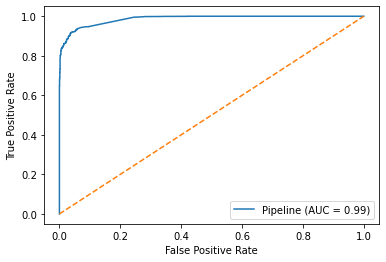

In [91]:
# Plots the ROC curve and visualizes the AUC score
plot_roc_curve(pipe, X_test, y_test)
plt.plot([0,1],[0,1], label='baseline', linestyle='--');

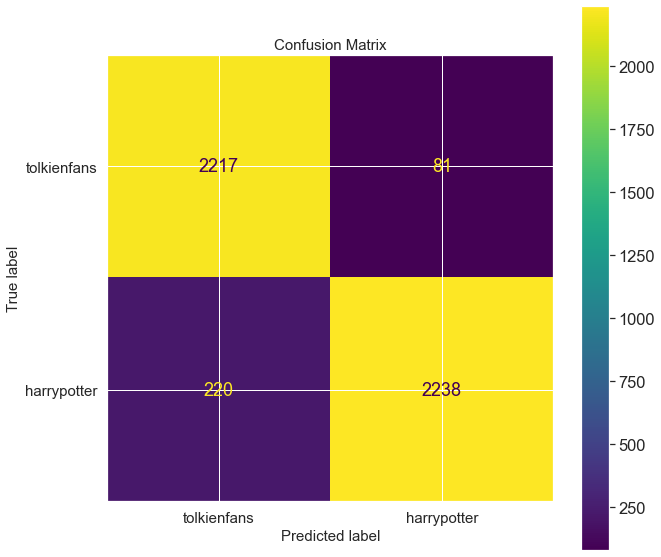

In [99]:
# Creates the confusion matrix and saves it as an image
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10, 10))
plot = ConfusionMatrixDisplay(cm).plot(ax=ax)
plot
plt.title('Confusion Matrix')
ax.set_title('Confusion Matrix', fontdict={'size':'15'})
ax.set_xticklabels(df['subreddit'].unique(), size=15);
ax.set_yticklabels(df['subreddit'].unique(), size=15);
ax.set_xlabel('Predicted label', fontdict={'size':'15'})
ax.set_ylabel('True label', fontdict={'size':'15'})

plt.savefig('../../../presentation/imgs/cm_rf_tfidf_lem.jpg')

In [101]:
# dir(pipe.named_steps['rf'])

In [102]:
# finds the feature importances from the pipeline
importances = pipe.named_steps['rf'].feature_importances_

In [103]:
importances

array([0., 0., 0., ..., 0., 0., 0.])

In [104]:
# finds the feature names from the pipeline's tfidfvectorizer
names = pipe.named_steps['tvec'].get_feature_names()

In [105]:
# Creates the feature importance dataframe
importance_dict = pd.DataFrame({'feature_importance': importances,
                                'features': names})
top10 = importance_dict.nlargest(10, columns=['feature_importance'])
top10

,feature_importance,features
1271,0.042623,harry
2710,0.041575,tolkien
2249,0.039992,ring
821,0.037722,earth
1323,0.028465,hogwarts
2301,0.027010,sauron
1321,0.025772,hobbit
2865,0.025680,voldemort
2034,0.025663,potter
2415,0.024837,silmarillion


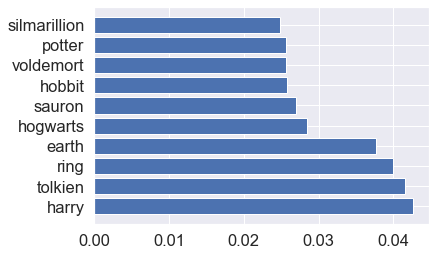

In [107]:
# Visualizes the feature importances

# plt.bar(x='features', height='feature_importances', data=top10);
plt.barh(top10['features'], top10['feature_importance']);
plt.savefig('../../../presentation/imgs/rf_tfidf_lem_featureImp.jpg')